#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import warnings

# Suppress future warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df_students = pd.read_csv("student-por.csv")

In [3]:
df_students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


#1. Preprocessing

In [4]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
df_students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [6]:
df_students.isna().sum(axis=0)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
df_students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
categorical_columns =['school', 'sex', 'address', 'famsize', 'Pstatus',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']

In [9]:
# Imputation transformer
imputer = SimpleImputer(strategy='mean') # or 'median', 'most_frequent'

# Encoding transformer
encoder = OneHotEncoder(handle_unknown='ignore')

# Scaling transformer
scaler = StandardScaler()

def dynamic_column_selector(column_names):
    def column_selector(X):
        return [col for col in column_names if col in X.columns]
    return column_selector

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, dynamic_column_selector(numerical_columns)),
        ('cat', encoder, dynamic_column_selector(categorical_columns)),
        ('impute', imputer, dynamic_column_selector(numerical_columns)),
    ])

In [10]:
# Creating Pipeline for each Model separately
pipe_dt = Pipeline([('preprocessor', preprocessor), ('DT', DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('preprocessor', preprocessor), ('RF', RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('preprocessor', preprocessor), ('KNN', KNeighborsClassifier())])

In [11]:
# Dividing Data into Training and Testing Dataset
X = df_students.drop('G3', axis=1)
y = df_students['G3'].ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#2. Training ML Models

DECISION TREE
Predicted Values: [17 11 17 12 11]
Actual Values: [19 12 18 11 11]
Decision Tree MAE: 0.83
Decision Tree RMSE: 1.42
Accuracy: 39.23%


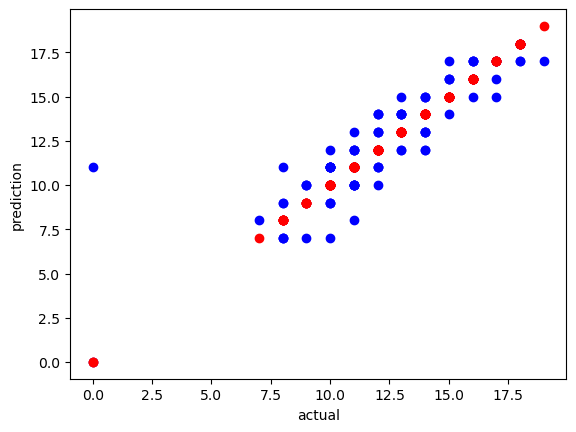



RANDOM FOREST
Predicted Values: [17 11 17 11 11]
Actual Values: [19 12 18 11 11]
Random Forest MAE: 0.7
Random Forest RMSE: 1.26
Accuracy: 46.15%


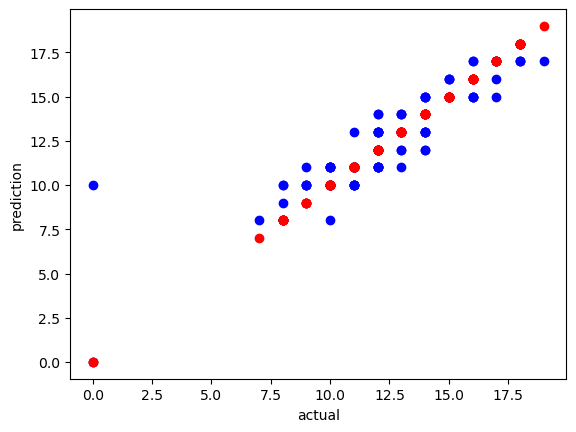



K-NEAREST NEIGHBORS
Predicted Values: [17 13 17 11 12]
Actual Values: [19 12 18 11 11]
K-Nearest Neighbors MAE: 1.15
K-Nearest Neighbors RMSE: 1.76
Accuracy: 30.0%


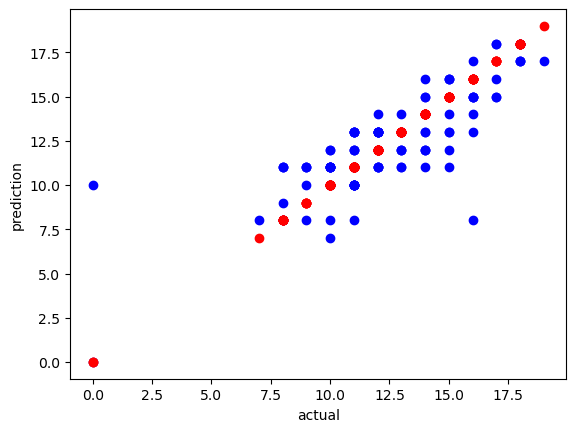

In [12]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

models = [pipe_dt, pipe_rf, pipe_knn]
model_names = ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors']

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name.upper())
    print(f"Predicted Values: {y_pred[:5]}")
    print(f"Actual Values: {y_test[:5]}")
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} MAE: {round(mae, 2)}")

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} RMSE: {round(rmse, 2)}")
    acc = accuracy_score(y_test, y_pred)*100
    print(f"Accuracy: {round(acc, 2)}%")
    plt.scatter(y_test, y_pred, color='blue', label='Predicted')
    plt.scatter(y_test, y_test, color='red', label='Actual')

    plt.xlabel("actual")
    plt.ylabel("prediction")
    plt.show()
    print("\n")


###The scatter plots suggest a concentration of accurate predictions within the range of Radiant to Ascendant 1 (7.5-18 on the ranking scale)

###Trained multiple models (Decision Tree, Random Forest, KNN, LASSO) to predict student G3 using stats. Random Forest performed best (46.15% accuracy), it's difficult to predict grade with high accuracy due to missing factors and limitations of the grade system itself.

#3.Hyperparameter Optimization

###Random Forest Optimization

In [13]:
# hyperparameter for Ranndom Forest
rf_params = {
    'RF__n_estimators': [100, 200],  # Number of trees (random int)
    'RF__max_depth': [3, 5],        # Maximum depth (random int)
    'RF__max_features': ['auto', 'sqrt', 'log2']  # Feature consideration (choice)
}

# Set the number of random parameter sets to explore (n_iter)
n_iter_search = 100

random_search_rf = RandomizedSearchCV(
    pipe_rf, rf_params, n_iter=n_iter_search, cv=5, scoring="accuracy", verbose=2
)

# Fit the RandomizedSearchCV model to your training data
random_search_rf.fit(X_train, y_train)

C:\Users\shall\Documents\New folder\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\shall\Documents\New folder\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END RF__max_depth=3, RF__max_features=auto, RF__n_estimators=100; total time=   0.1s
[CV] END RF__max_depth=3, RF__max_features=auto, RF__n_estimators=100; total time=   0.1s
[CV] END RF__max_depth=3, RF__max_features=auto, RF__n_estimators=100; total time=   0.0s
[CV] END RF__max_depth=3, RF__max_features=auto, RF__n_estimators=100; total time=   0.1s
[CV] END RF__max_depth=3, RF__max_features=auto, RF__n_estimators=100; total time=   0.1s
[CV] END RF__max_depth=3, RF__max_features=auto, RF__n_estimators=200; total time=   0.3s
[CV] END RF__max_depth=3, RF__max_features=auto, RF__n_estimators=200; total time=   0.3s
[CV] END RF__max_depth=3, RF__max_features=auto, RF__n_estimators=200; total time=   0.3s
[CV] END RF__max_depth=3, RF__max_features=auto, RF__n_estimators=200; total time=   0.2s
[CV] END RF__max_depth=3, RF__max_features=auto, RF__n_estimators=200; total time=   0.2s
[CV] END RF__max_depth=3, RF__max_featu

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               <function dynamic_column_selector.<locals>.column_selector at 0x000002441219F9C0>),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               <function dynamic_column_selector.<locals>.column_selector at 0x000002441219D620>),
                                                                              ('impute',
                                                                               SimpleImputer(),
                                                                               <function dynamic_column_selector.<locals>.column_selector at 0x000002441219FCE0>)])),
                                             ('RF',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=100,
                   param_distributions={'RF__max_depth': [3, 5],
                                        'RF__max_features': ['auto', 'sqrt',
                                                             'log2'],
                                        'RF__n_estimators': [100, 200]},
                   scoring='accuracy', verbose=2)

In [14]:
best_random_rf = random_search_rf.best_estimator_
random_rf_accuracy = best_random_rf.score(X_test, y_test)
print(random_rf_accuracy)

0.46923076923076923


In [15]:
# Implenting GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(pipe_rf, rf_params, cv=3, scoring="accuracy", verbose =2)
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END RF__max_depth=3, RF__max_features=auto, RF__n_estimators=100; total time=   0.1s


C:\Users\shall\Documents\New folder\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END RF__max_depth=3, RF__max_features=auto, RF__n_estimators=100; total time=   0.1s
[CV] END RF__max_depth=3, RF__max_features=auto, RF__n_estimators=100; total time=   0.1s
[CV] END RF__max_depth=3, RF__max_features=auto, RF__n_estimators=200; total time=   0.2s
[CV] END RF__max_depth=3, RF__max_features=auto, RF__n_estimators=200; total time=   0.3s
[CV] END RF__max_depth=3, RF__max_features=auto, RF__n_estimators=200; total time=   0.2s
[CV] END RF__max_depth=3, RF__max_features=sqrt, RF__n_estimators=100; total time=   0.1s
[CV] END RF__max_depth=3, RF__max_features=sqrt, RF__n_estimators=100; total time=   0.1s
[CV] END RF__max_depth=3, RF__max_features=sqrt, RF__n_estimators=100; total time=   0.1s
[CV] END RF__max_depth=3, RF__max_features=sqrt, RF__n_estimators=200; total time=   0.3s
[CV] END RF__max_depth=3, RF__max_features=sqrt, RF__n_estimators=200; total time=   0.2s
[CV] END RF__max_depth=3, RF__max_features=sqrt, RF__n_estimators=200; total time=   0.2s
[CV] END R

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         <function dynamic_column_selector.<locals>.column_selector at 0x000002441219F9C0>),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <function dynamic_column_selector.<locals>.column_selector at 0x000002441219D620>),
                                                                        ('impute',
                                                                         SimpleImputer(),
                                                                         <function dynamic_column_selector.<locals>.column_selector at 0x000002441219FCE0>)])),
                                       ('RF',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'RF__max_depth': [3, 5],
                         'RF__max_features': ['auto', 'sqrt', 'log2'],
                         'RF__n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [16]:
best_grid_rf = grid_search_rf.best_estimator_
grid_rf_accuracy = best_grid_rf.score(X_test, y_test)
print(grid_rf_accuracy)

0.4461538461538462


###Decision Tree Optimization

In [17]:
# hyperparameter for Decision Tree
dt_params = {
    'DT__max_depth': [2, 4, 6],
    'DT__min_samples_leaf': [2, 4, 6],
}


random_search_dt = RandomizedSearchCV(
    pipe_dt, dt_params, cv=5, scoring="accuracy", verbose=2
)

# Fit the RandomizedSearchCV model to your training data
random_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=4; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=4; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=4; total time=   0.0s


C:\Users\shall\Documents\New folder\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\shall\Documents\New folder\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END ............DT__max_depth=2, DT__min_samples_leaf=4; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=4; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=6; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=6; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=6; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=6; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=6; total time=   0.0s
[CV] END ............DT__max_depth=4, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max_depth=4, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max_depth=4, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max_depth=4, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max_depth=4, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               <function dynamic_column_selector.<locals>.column_selector at 0x000002441219F9C0>),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               <function dynamic_column_selector.<locals>.column_selector at 0x000002441219D620>),
                                                                              ('impute',
                                                                               SimpleImputer(),
                                                                               <function dynamic_column_selector.<locals>.column_selector at 0x000002441219FCE0>)])),
                                             ('DT',
                                              DecisionTreeClassifier(random_state=42))]),
                   param_distributions={'DT__max_depth': [2, 4, 6],
                                        'DT__min_samples_leaf': [2, 4, 6]},
                   scoring='accuracy', verbose=2)

In [18]:
best_random_dt = random_search_dt.best_estimator_
random_dt_accuracy = best_random_dt.score(X_test, y_test)
print(random_dt_accuracy)

0.45384615384615384


In [19]:
# Implenting GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(pipe_dt, dt_params, cv=3, scoring="accuracy", verbose =2)
grid_search_dt.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=4; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=4; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=4; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=6; total time=   0.0s
[CV] END ............DT__max_depth=2, DT__min_samples_leaf=6; total time=   0.0s


C:\Users\shall\Documents\New folder\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END ............DT__max_depth=2, DT__min_samples_leaf=6; total time=   0.0s
[CV] END ............DT__max_depth=4, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max_depth=4, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max_depth=4, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max_depth=4, DT__min_samples_leaf=4; total time=   0.0s
[CV] END ............DT__max_depth=4, DT__min_samples_leaf=4; total time=   0.0s
[CV] END ............DT__max_depth=4, DT__min_samples_leaf=4; total time=   0.0s
[CV] END ............DT__max_depth=4, DT__min_samples_leaf=6; total time=   0.0s
[CV] END ............DT__max_depth=4, DT__min_samples_leaf=6; total time=   0.0s
[CV] END ............DT__max_depth=4, DT__min_samples_leaf=6; total time=   0.0s
[CV] END ............DT__max_depth=6, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max_depth=6, DT__min_samples_leaf=2; total time=   0.0s
[CV] END ............DT__max

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         <function dynamic_column_selector.<locals>.column_selector at 0x000002441219F9C0>),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <function dynamic_column_selector.<locals>.column_selector at 0x000002441219D620>),
                                                                        ('impute',
                                                                         SimpleImputer(),
                                                                         <function dynamic_column_selector.<locals>.column_selector at 0x000002441219FCE0>)])),
                                       ('DT',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'DT__max_depth': [2, 4, 6],
                         'DT__min_samples_leaf': [2, 4, 6]},
             scoring='accuracy', verbose=2)

In [20]:
best_grid_dt = grid_search_dt.best_estimator_
grid_dt_accuracy = best_grid_dt.score(X_test, y_test)
print(grid_dt_accuracy)

0.46923076923076923


###Hyperparameter tuning resulted in a decision tree accuracy improvement from 39.23% to 46.92%. Random Forest performance remained largely unchanged. These results suggest that even with optimized models, student grade prediction based solely on stats is unlikely to achieve more than 46.92% accuracy. This indicates that other factors beyond the provided data may significantly influence student grades.
